In [2]:
from turtle import shape
from tsai.all import *
import pandas as pd
from datenverarbeitung.broken_dataloader import dataloader

num_scenario = 3
nr_taps = 2
learning_cycles = 25
features_to_learn_with = ["pitch","nosetip_y","nosetip_x","chin_x","chin_y","roll","yaw","left_eye_corner_x","left_eye_corner_y","right_eye_corner_x","right_eye_corner_y","left_mouth_corner_x","left_mouth_corner_y","right_mouth_corner_x","right_mouth_corner_y","nose_end_point_x","nose_end_point_y","head_pose1_x","head_pose1_y","head_pose2_x","head_pose2_y"]
feature_list_string = '_'.join(features_to_learn_with)
models_folder = "models"
plots_folder = "vis/plots"

dl = dataloader(scenario= num_scenario, path="/Users/adi/Nextcloud/smart_hans/AP2/Daten/headpose_opencv_pitch_roll_yaw_20220904", nr_taps=nr_taps, move_window_by=-10, feature_list=features_to_learn_with)
df_n = dl.df

print(" hhhhhhhh ")

cols = list(df_n.columns)
a, b = cols.index('sample_index'), cols.index('feature')
cols[b], cols[a] = cols[a], cols[b]
df_n = df_n[cols]
print(df_n)
df_n = df_n.sort_values(['feature','target'])


smart_hans_08022022_194751_7_250-281_08_gny_.csv
smart_hans_08022022_192131_8_280-310_08_wny_.csv
smart_hans_08022022_190823_13_429-460_08_mny_person_hat_nicht_auf_huf_geschaut.csv
smart_hans_07312022_170216_4_149-178_08_mgy_furz_lachen_am_ende.csv
smart_hans_08022022_182746_7_242-273_08_wny_.csv
smart_hans_08022022_184110_5_176-207_08_mgy_.csv
smart_hans_07312022_185231_4_153-182_08_mny_.csv
smart_hans_07312022_174011_10_330-358_08_mny_.csv
smart_hans_08022022_192219_4_154-184_08_wny_person_hat_nach_12_gewackelt.csv
smart_hans_08022022_191248_9_307-336_08_mny_.csv
smart_hans_08022022_205208_8_276-308_08_wnn_.csv
smart_hans_08022022_191134_12_403-433_08_mny_.csv
smart_hans_08022022_185137_12_400-430_08_mny_.csv
smart_hans_08022022_172713_13_435-465_08_mgn_.csv
smart_hans_08022022_211022_9_314-345_08_mgy_.csv
smart_hans_07312022_164838_8_276-305_08_mgy_klatschen_8_ende.csv
smart_hans_08022022_184808_8_276-305_08_mny_.csv
smart_hans_08022022_195222_3_123-154_08_gny_.csv
smart_hans_080220

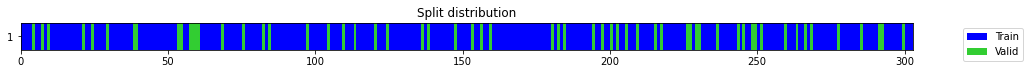

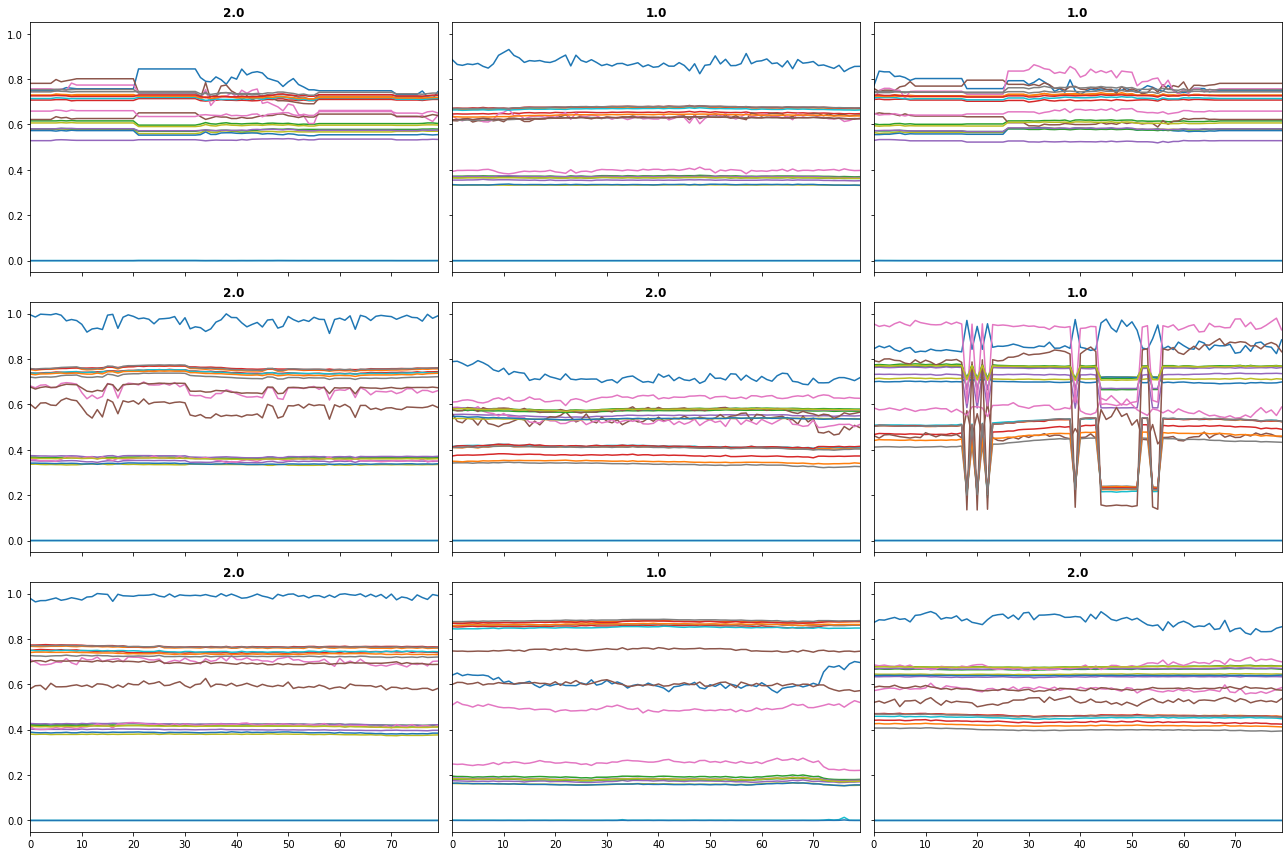

In [4]:
X, old_y, names = df2xy (df_n, sample_col='sample_index', feat_col='feature', target_col='target', data_cols=None, steps_in_rows=True, return_names=True)

y = np.empty(len(old_y))
for i, elem in enumerate(old_y):
            remainder = int(elem[0]) % 10
            y[i] = remainder

#splits = get_splits(y, valid_size=.2)

tfms  = [None, TSRegression()]
dsets = TSDatasets( X,  inplace=True, tfms=[None, TSClassification()])

dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, num_workers=0, tfms=[None, TSClassification()], item_tfs=TSClassification())
b = dls.one_batch()

dls.show_batch(sharey=True)

In [37]:
model = InceptionTime(dls.vars,dls.c)
learn = Learner(dls, model)
valid_dl = dls.valid

learn.load('/Users/adi/Documents/code/smart_hans/Machine_learning/models/multivariate_scenario_3_InceptionTime_features_features: 21_nr_taps_2_stage0')

# print(X.shape)
# print(X)
# print(X[0].shape)
# a = np.empty(shape=3)
# a = np.concatenate()
# a[0] 

test_probas, test_targets, test_preds = learn.get_X_preds(X[:1, :], with_decoded=True)
test_probas, test_targets, test_preds
# # Unlabeled data
# test_ds = dls.dataset.add_test(X)
# test_dl = valid_dl.new(test_ds)
# next(iter(test_dl))


# test_probas, *_ = learn.get_preds(dl=test_dl.dataset[0], save_preds=None)
# test_probas




(TensorBase([[0.4423, 0.5577]]), None, array(['2.0'], dtype='<U3'))